#Старт

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
from google.colab import files
import shutil # для сохранения весов

# Для отрисовки bounding box'ов
import cv2
from google.colab.patches import cv2_imshow
from IPython.display import Image

import os

import time # функционал для работы со временем
import datetime # функционал для работы с датами и временем

# Функция звукового сигнала выполнения ячейки
from google.colab import output
def beep():
  output.eval_js('new Audio("https://upload.wikimedia.org/wikipedia/commons/0/05/Beep-09.ogg").play()')
beep()

Mounted at /content/drive


#Пример из датасета с bounding box'ом

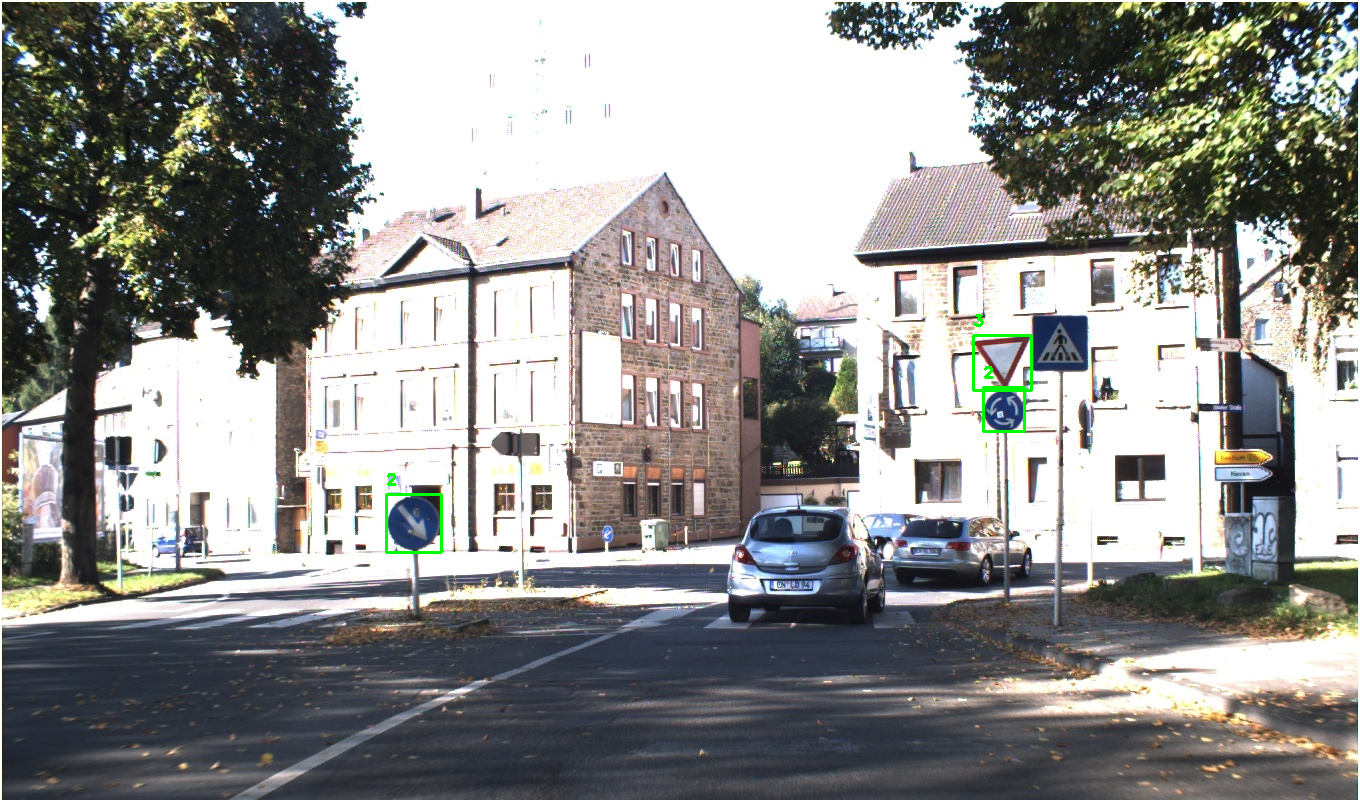

In [ ]:
label_file = '00001.txt'

# Путь к папке с лейблами
dir_labels = '/content/drive/MyDrive/ITMO/dl_practice/datasets/TrafficSignsDataset_plus/train/labels'


# Для обработки и сохранения всех файлов в папке
# list_dir = os.listdir(dir_labels)
# for label_file in list_dir:

# Для одиночной обработки и просмотра/сохранения
label_path = f'{dir_labels}/{label_file}'
# Путь к папке с исходными изображениями
image_path = f'/content/drive/MyDrive/ITMO/dl_practice/datasets/TrafficSignsDataset_plus/train/images/{label_file[:-4]}.jpg'

# Чтение координат из label.txt
with open(label_path, 'r') as file:
    lines = file.readlines()

# Загрузка изображения
image = cv2.imread(image_path)

# Рисование bounding box
for line in lines:
    # Разделение строки на координаты
    class_label, x, y, width, height = map(float, line.split())

    # Преобразование координат в формат OpenCV
    left = int((x - width /2) * image.shape[1])
    top = int((y - height /2) * image.shape[0])
    right = int((x + width /2) * image.shape[1])
    bottom = int((y + height /2) * image.shape[0])

    # Рисование bounding box
    cv2.rectangle(image, (left, top), (right, bottom), (0, 255, 0), 2)
    cv2.putText(image, str(int(class_label)), (left, top - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

    # # Сохранение изображения с bounding box
    # cv2.imwrite(f'/content/drive/MyDrive/Colab Notebooks/ITMO/dl_practice/datasets/train_img_bb/{label_file[:-4]}.jpg', image)

cv2_imshow(image)

#Ultralytics из Git-репозитория

In [2]:
!pip install ultralytics
import ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 646.0/646.0 kB 9.1 MB/s eta 0:00:00


# Обучение

In [4]:
# Создаем объект модели, указываем путь к весам в входном параметре
from ultralytics import YOLO
# model = YOLO('yolov8n.pt') # Для первого запуска

# Для предобученных весов
path_weights = '/content/drive/MyDrive/Projects/ITMO/dl_practice/weights/'
name_weights = 'yolov8n_1129_22_ds3_ep50+50+50'
model = YOLO(f'{path_weights}{name_weights}.pt')

In [6]:
model_name = 'yolov8n'
data_set = 'ds3'
epochs = 50
n_experiment = "23" # Номер эксперимента
data_today = str(datetime.date.today())[-5:-3]+ str(datetime.date.today())[-2:] # Дата сегодня
name_exp = f"{model_name}_{data_today}_{n_experiment}_{data_set}_ep{epochs}+50+50+50"

model.train(data='/content/drive/MyDrive/Projects/ITMO/dl_practice/datasets/TrafficSignsDataset_plus/data_custom.yaml', epochs=epochs)  # Обучаем модель

Ultralytics YOLOv8.0.220 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=/content/drive/MyDrive/Projects/ITMO/dl_practice/weights/yolov8n_1129_22_ds3_ep50+50+50.pt, data=/content/drive/MyDrive/Projects/ITMO/dl_practice/datasets/TrafficSignsDataset_plus/data_custom.yaml, epochs=50, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, show=Fal

100%|██████████| 755k/755k [00:00<00:00, 37.8MB/s]



                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128

100%|██████████| 6.23M/6.23M [00:00<00:00, 59.2MB/s]


AMP: checks passed ✅


train: Scanning /content/drive/MyDrive/Projects/ITMO/dl_practice/datasets/TrafficSignsDataset_plus/train/labels... 1315 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1315/1315 [09:55<00:00,  2.21it/s]

train: WARNING ⚠️ /content/drive/MyDrive/Projects/ITMO/dl_practice/datasets/TrafficSignsDataset_plus/train/images/00340.jpg: 1 duplicate labels removed


train: New cache created: /content/drive/MyDrive/Projects/ITMO/dl_practice/datasets/TrafficSignsDataset_plus/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/drive/MyDrive/Projects/ITMO/dl_practice/datasets/TrafficSignsDataset_plus/val/labels... 319 images, 0 backgrounds, 0 corrupt: 100%|██████████| 319/319 [02:24<00:00,  2.21it/s]


val: New cache created: /content/drive/MyDrive/Projects/ITMO/dl_practice/datasets/TrafficSignsDataset_plus/val/labels.cache
Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train2
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      2.42G     0.6901     0.4238     0.8177          5        640: 100%|██████████| 83/83 [00:49<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.39it/s]

                   all        319        474      0.899      0.882      0.932      0.671



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50       2.3G     0.7059     0.4398     0.8251          7        640: 100%|██████████| 83/83 [00:45<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.74it/s]

                   all        319        474      0.937      0.858      0.942      0.646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50       2.3G     0.7702     0.4713     0.8328          5        640: 100%|██████████| 83/83 [00:45<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.77it/s]

                   all        319        474      0.927      0.879      0.941       0.67



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      2.32G     0.7743     0.4774     0.8408          6        640: 100%|██████████| 83/83 [00:46<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.82it/s]

                   all        319        474      0.919      0.875      0.937      0.647



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      2.31G     0.7939     0.5019     0.8423          3        640: 100%|██████████| 83/83 [00:46<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.85it/s]

                   all        319        474      0.909      0.892      0.939      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50       2.3G     0.8246     0.5111     0.8484          6        640: 100%|██████████| 83/83 [00:46<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.84it/s]

                   all        319        474      0.896      0.864      0.937      0.645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50       2.3G     0.7757     0.4855     0.8368          6        640: 100%|██████████| 83/83 [00:46<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.86it/s]

                   all        319        474      0.914      0.911      0.944      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50       2.3G     0.7887     0.4945     0.8334          6        640: 100%|██████████| 83/83 [00:46<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.81it/s]

                   all        319        474        0.9       0.86      0.919      0.644



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50       2.3G     0.7853     0.4989     0.8389          6        640: 100%|██████████| 83/83 [00:46<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.74it/s]

                   all        319        474      0.913      0.864      0.936      0.628



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50       2.3G     0.8092     0.5001     0.8423         13        640: 100%|██████████| 83/83 [00:46<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.83it/s]

                   all        319        474      0.928      0.855      0.932      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50       2.3G     0.8042     0.5056     0.8507          9        640: 100%|██████████| 83/83 [00:44<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.79it/s]

                   all        319        474      0.917      0.815      0.924      0.635



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      2.32G     0.7687     0.4922     0.8316          7        640: 100%|██████████| 83/83 [00:43<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.35it/s]

                   all        319        474      0.926      0.896      0.948      0.668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      2.31G     0.7589     0.4715     0.8351          9        640: 100%|██████████| 83/83 [00:41<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:08<00:00,  1.23it/s]

                   all        319        474      0.935      0.847      0.923      0.659



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50       2.3G     0.7629     0.4754     0.8296         10        640: 100%|██████████| 83/83 [00:43<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.45it/s]

                   all        319        474      0.898      0.872      0.927      0.633



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      2.29G     0.7535     0.4773     0.8402          5        640: 100%|██████████| 83/83 [00:44<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.81it/s]

                   all        319        474      0.913       0.87      0.931      0.659



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50       2.3G     0.7767     0.4818     0.8389         10        640: 100%|██████████| 83/83 [00:43<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.79it/s]

                   all        319        474      0.905      0.888      0.934      0.654



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      2.31G     0.7596     0.4634      0.835          7        640: 100%|██████████| 83/83 [00:44<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.60it/s]

                   all        319        474      0.884      0.889      0.938      0.681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50       2.3G     0.7355     0.4528     0.8305         12        640: 100%|██████████| 83/83 [00:41<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:08<00:00,  1.22it/s]

                   all        319        474      0.909      0.916      0.949      0.671



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      2.29G      0.712     0.4486     0.8234          4        640: 100%|██████████| 83/83 [00:41<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.28it/s]

                   all        319        474      0.896      0.851       0.93       0.65



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      2.32G     0.7339     0.4526     0.8301          9        640: 100%|██████████| 83/83 [00:43<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.63it/s]

                   all        319        474      0.904       0.92      0.951      0.679



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50       2.3G     0.7377     0.4557     0.8281         10        640: 100%|██████████| 83/83 [00:44<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.83it/s]

                   all        319        474      0.895      0.881      0.934      0.662



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50       2.3G      0.729     0.4559     0.8273          3        640: 100%|██████████| 83/83 [00:44<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.55it/s]

                   all        319        474      0.916      0.901      0.944      0.676



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50       2.3G     0.7129     0.4465     0.8274         11        640: 100%|██████████| 83/83 [00:42<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.32it/s]

                   all        319        474      0.928       0.92      0.952      0.664



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50       2.3G     0.7065     0.4458     0.8328          7        640: 100%|██████████| 83/83 [00:41<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.26it/s]

                   all        319        474      0.925      0.904      0.947      0.677



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      2.32G     0.6957     0.4324     0.8164          7        640: 100%|██████████| 83/83 [00:43<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.65it/s]

                   all        319        474      0.924      0.897      0.941      0.674



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      2.31G      0.725      0.439     0.8332          8        640: 100%|██████████| 83/83 [00:44<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.77it/s]

                   all        319        474      0.898      0.882      0.936      0.668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      2.31G     0.6996     0.4229     0.8226          7        640: 100%|██████████| 83/83 [00:44<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.81it/s]

                   all        319        474      0.899      0.894       0.94       0.65



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      2.31G      0.699     0.4306     0.8277          4        640: 100%|██████████| 83/83 [00:43<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.46it/s]

                   all        319        474      0.909      0.893      0.941      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50       2.3G     0.6951      0.443     0.8308          5        640: 100%|██████████| 83/83 [00:41<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:08<00:00,  1.22it/s]

                   all        319        474       0.92      0.869      0.943      0.659



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50       2.3G     0.6878     0.4243     0.8259          6        640: 100%|██████████| 83/83 [00:43<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.52it/s]

                   all        319        474      0.914      0.911      0.949      0.669



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50       2.3G     0.6774     0.4192     0.8234         11        640: 100%|██████████| 83/83 [00:44<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.87it/s]

                   all        319        474      0.888      0.899      0.936      0.668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50       2.3G     0.6679     0.4167     0.8223          8        640: 100%|██████████| 83/83 [00:44<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.86it/s]

                   all        319        474      0.896      0.907      0.946      0.688



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50       2.3G      0.688     0.4168     0.8218         12        640: 100%|██████████| 83/83 [00:43<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.43it/s]

                   all        319        474      0.924      0.876      0.945      0.686



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50       2.3G     0.6526     0.4034     0.8152          8        640: 100%|██████████| 83/83 [00:42<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:08<00:00,  1.20it/s]

                   all        319        474      0.909      0.885      0.943      0.687



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50       2.3G      0.666       0.41     0.8176          8        640: 100%|██████████| 83/83 [00:43<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.54it/s]

                   all        319        474      0.894      0.901      0.946      0.684



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50       2.3G       0.67     0.4113     0.8204          7        640: 100%|██████████| 83/83 [00:44<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.84it/s]

                   all        319        474       0.94      0.852      0.944      0.678



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50       2.3G     0.6608     0.4096      0.815          5        640: 100%|██████████| 83/83 [00:43<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.76it/s]

                   all        319        474      0.935      0.876      0.947      0.678



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      2.31G     0.6506     0.3906     0.8146          7        640: 100%|██████████| 83/83 [00:44<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.53it/s]

                   all        319        474      0.909      0.899      0.939      0.683



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      2.29G     0.6412     0.3933     0.8125         10        640: 100%|██████████| 83/83 [00:42<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.28it/s]

                   all        319        474      0.913      0.885      0.945      0.675



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50       2.3G     0.6429     0.3917     0.8143          8        640: 100%|██████████| 83/83 [00:42<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.43it/s]

                   all        319        474      0.924      0.889      0.946       0.69


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      2.29G     0.6335       0.38      0.813          4        640: 100%|██████████| 83/83 [00:44<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.80it/s]

                   all        319        474      0.907      0.861      0.933      0.698



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50       2.3G     0.6049     0.3748     0.8121          3        640: 100%|██████████| 83/83 [00:42<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.92it/s]

                   all        319        474      0.888      0.871      0.935      0.701



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      2.29G     0.6096     0.3608     0.8162          4        640: 100%|██████████| 83/83 [00:42<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.94it/s]

                   all        319        474      0.908      0.871      0.937      0.703



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      2.29G     0.5814     0.3544     0.8021          5        640: 100%|██████████| 83/83 [00:42<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.93it/s]

                   all        319        474      0.897      0.891      0.938      0.705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50       2.3G     0.5901     0.3582     0.8095          3        640: 100%|██████████| 83/83 [00:42<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.50it/s]

                   all        319        474      0.923      0.875      0.939      0.701



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50       2.3G     0.5861     0.3559     0.8048          4        640: 100%|██████████| 83/83 [00:41<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.36it/s]

                   all        319        474      0.936      0.863      0.942      0.706



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      2.29G     0.5825     0.3492     0.7999          4        640: 100%|██████████| 83/83 [00:40<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.29it/s]

                   all        319        474       0.92      0.869       0.94      0.707



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50       2.3G     0.5733     0.3482     0.8054          4        640: 100%|██████████| 83/83 [00:39<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.32it/s]

                   all        319        474       0.89      0.883      0.938      0.707



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50       2.3G     0.5749     0.3463     0.8007          6        640: 100%|██████████| 83/83 [00:40<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:07<00:00,  1.33it/s]

                   all        319        474      0.876      0.895      0.938      0.708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50       2.3G     0.5762     0.3513     0.8021          7        640: 100%|██████████| 83/83 [00:41<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:06<00:00,  1.54it/s]

                   all        319        474      0.929      0.857      0.939      0.706



50 epochs completed in 0.713 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 6.2MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics YOLOv8.0.220 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3006428 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:08<00:00,  1.23it/s]


                   all        319        474      0.876      0.897      0.938      0.709
                     0        319        188      0.896      0.917      0.924      0.708
                     1        319        102      0.884      0.897      0.963      0.741
                     2        319        105      0.892      0.876      0.933      0.654
                     3        319         79       0.83      0.899      0.933      0.734
Speed: 0.3ms preprocess, 2.5ms inference, 0.0ms loss, 3.8ms postprocess per image
Results saved to runs/detect/train2


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7b1759545600>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0

In [7]:
# Указываем путь к файлу лучших весов сохранённых в content/runs
best_weights_path = '/content/runs/detect/train2/weights/best.pt'

# Указываем путь для сохранения лучших весов на Google Drive
best_weights_path_drive = f'{path_weights}{name_exp}.pt'

# Копируем файл весов на Google Drive
shutil.copy(best_weights_path, best_weights_path_drive)
beep()